<a href="https://colab.research.google.com/github/solobt777/Python_solobt777/blob/main/Week-4_ML_Classification/DecisionTree_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.tree as DecisionTreeClassifier
import sklearn.metrics as classification_report

In [ ]:
#pd.read_csv("Social_Network_Ads.csv")

df=pd.read_csv("Social_Network_Ads.csv")
df=pd.get_dummies(df,drop_first=True)

X = df.drop('Purchased', axis=1)
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



              precision    recall  f1-score   support

           0       0.90      0.95      0.93        79
           1       0.89      0.80      0.85        41

    accuracy                           0.90       120
   macro avg       0.90      0.88      0.89       120
weighted avg       0.90      0.90      0.90       120



/Users/solomonrajkumar.sathianandaraj/.pyenv/versions/3.13.3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Purchased
0    79
1    41
Name: count, dtype: int64

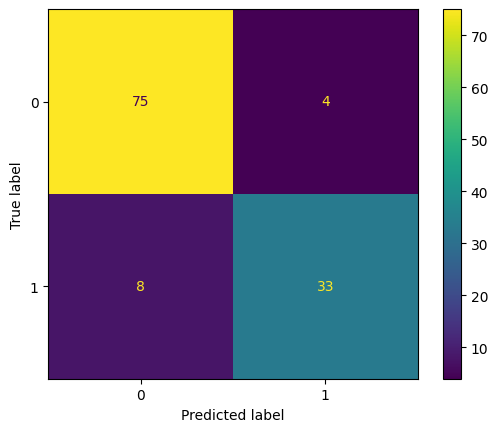

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gsv = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
gsv.fit(X, y)
gsv.best_params_

decision_tree_classifier = DecisionTreeClassifier(**gsv.best_params_)
decision_tree_classifier.fit(X_train, y_train)
y_pred = decision_tree_classifier.predict(X_test)


print(classification_report(y_test, y_pred))



final = decision_tree_classifier.predict([[40, 300, 1, 0]])

cf = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cf).plot()
decision_tree_classifier.classes_
pd.Series(y_test).value_counts()

In [17]:
df.Purchased.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [24]:
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#cf = confusion_matrix(y_test, y_pred)

#ConfusionMatrixDisplay(cf).plot()

In [25]:
#print(classification_report.classification_report(y_test, y_pred))

In [26]:
final = decision_tree_classifier.predict([[40, 300, 1, 0]])
decision_tree_classifier.classes_


/Users/solomonrajkumar.sathianandaraj/.pyenv/versions/3.13.3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0, 1])